In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
df = pd.read_csv('data.csv')

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histograms(data, columns):
    num_rows = len(columns) // 2 + len(columns) % 2
    num_cols = 2

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 30))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        sns.histplot(data[column], bins=30, kde=True, ax=axes[i], edgecolor='black', color='orange')
        axes[i].set_title(f'Distribution of {column}')
        axes[i].set_xlabel(' ')
        axes[i].set_ylabel('Frequency')
        axes[i].grid(True)

    plt.tight_layout()
    plt.show()

# Apply the function
# plot_histograms(filtered_data, histogram_columns)


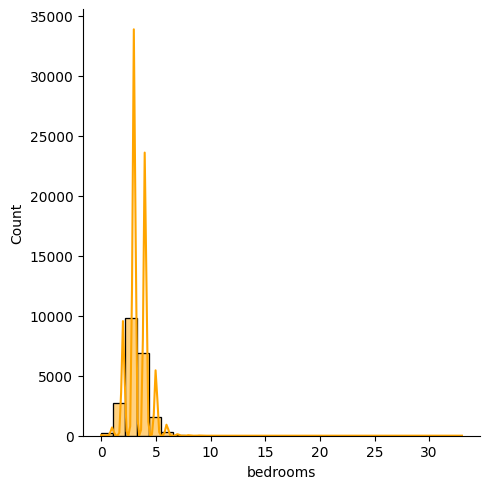

In [77]:
sns.displot(df['bedrooms'], bins=30, kde=True, edgecolor='black', color='orange')

<Axes: xlabel='bedrooms'>

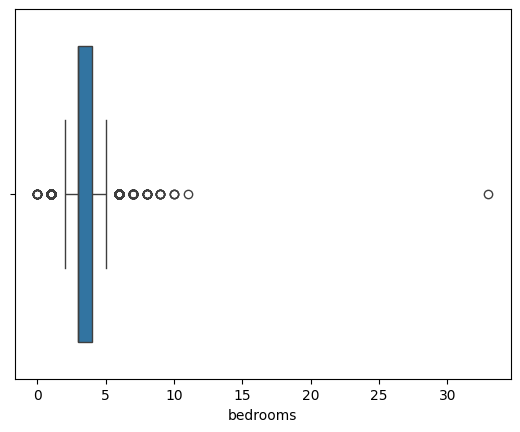

In [78]:
sns.boxplot(x=df['bedrooms'])

<Axes: xlabel='bedrooms'>

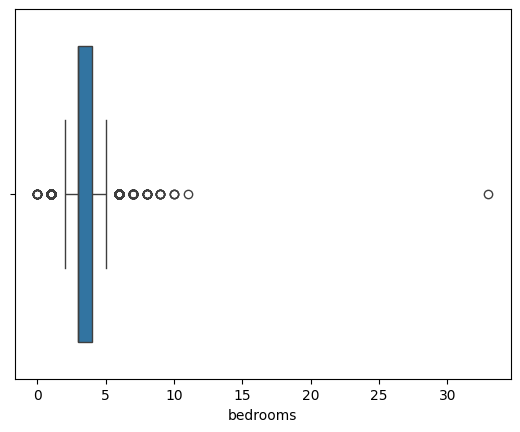

In [79]:
sns.boxplot(x=df['bedrooms'])

In [80]:
import numpy as np
import pandas as pd

def winsorize_column(dataframe, column_name, lower_percentile=0.05, upper_percentile=0.95):
    """
    Winsorize a specific column in a DataFrame by setting extreme values to specified percentiles.

    Parameters:
    - dataframe (pd.DataFrame): The DataFrame containing the data.
    - column_name (str): The name of the column to winsorize.
    - lower_percentile (float): The lower percentile value. Defaults to 0.05.
    - upper_percentile (float): The upper percentile value. Defaults to 0.95.

    Returns:
    - pd.Series: The winsorized column.
    """

    # Calculate the lower and upper bounds for winsorizing
    lower_bound = dataframe[column_name].quantile(lower_percentile)
    upper_bound = dataframe[column_name].quantile(upper_percentile)

    # Winsorize the column
    winsorized_column = np.clip(dataframe[column_name], lower_bound, upper_bound)

    return winsorized_column

# Example usage:
# Assuming you have a DataFrame 'df' and you want to winsorize the 'sqft_living' column
# df['sqft_living_winsorized'] = winsorize_column(df, 'sqft_living')


In [81]:
def count_outliers(dataframe, column_name):
    # Extract the specified column
    column_data = dataframe[column_name]

    # Calculate the first and third quartiles
    Q1 = column_data.quantile(0.25)
    Q3 = column_data.quantile(0.75)

    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count the number of outliers
    outliers_count = ((column_data < lower_bound) | (column_data > upper_bound)).sum()

    return outliers_count

In [82]:
columns_to_winsorize = ['bedrooms', 'bathrooms', 'floors', 'condition','long','waterfront']

In [83]:
for column in columns_to_winsorize:
    df[column] = winsorize_column(df, column)

In [84]:
count_outliers(df, columns_to_winsorize)

bedrooms      0
bathrooms     0
floors        0
condition     0
long          0
waterfront    0
dtype: int64

In [85]:
df.shape

(21613, 21)

<Axes: xlabel='bedrooms'>

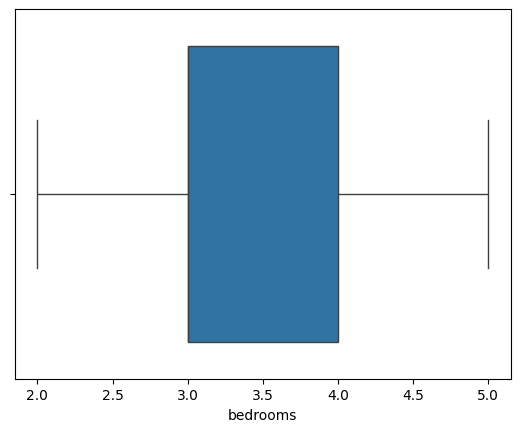

In [86]:
sns.boxplot(x=df['bedrooms'])

In [87]:
def log_transform_column(dataframe, column_name):

    # Adding a small constant to handle zero values in the column
    transformed_column = np.log1p(dataframe[column_name])

    # Replace the column in the original DataFrame
    dataframe[column_name] = transformed_column

    return dataframe[column_name]


In [88]:
column_to_log_transform = ['sqft_living', 'sqft_above', 'sqft_basement', 'sqft_living15']

In [89]:
for column in column_to_log_transform:
    df[column] = log_transform_column(df, column)

In [90]:
count_outliers(df, column_to_log_transform)

sqft_living      110
sqft_above        51
sqft_basement      0
sqft_living15     78
dtype: int64

In [91]:
df.shape

(21613, 21)

In [92]:
sqftvar=['sqft_lot','sqft_lot15','view','grade']

In [93]:
count_outliers(df,sqftvar)

sqft_lot      2425
sqft_lot15    2194
view          2124
grade         1911
dtype: int64

In [94]:
backupdf=df

In [95]:
df=backupdf

In [96]:
import pandas as pd

def drop_outliers(df, column_name, threshold=1.5):
    # Calculate the IQR (Interquartile Range)
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1

    # Define the lower and upper bounds for outliers
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr

    # Find the indexes of outliers
    outliers_index = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)].index.tolist()

    # Drop the records with outliers
    df_filtered = df.drop(outliers_index)

    return df_filtered, outliers_index

# Example usage:
# Assume 'your_dataframe' is your DataFrame and 'your_column' is the column where you want to detect outliers.
# The default threshold is set to 1.5, but you can change it as needed.

# Now 'your_dataframe' contains records without outliers, and 'outliers_index' contains the indexes of the dropped outliers.


In [97]:
count_outliers(df, column_to_log_transform)

sqft_living      110
sqft_above        51
sqft_basement      0
sqft_living15     78
dtype: int64

In [98]:
for column in column_to_log_transform:
    df, _ = drop_outliers(df, column)

In [99]:
count_outliers(df, column_to_log_transform)

sqft_living      10
sqft_above        1
sqft_basement     0
sqft_living15     9
dtype: int64

In [100]:
for column in column_to_log_transform:
    df, _ = drop_outliers(df, column)

In [101]:
count_outliers(df, column_to_log_transform)

sqft_living      0
sqft_above       0
sqft_basement    0
sqft_living15    0
dtype: int64

In [102]:
df.shape

(21403, 21)

In [103]:
newlist=[

 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [104]:
count_outliers(df,newlist)

price            1053
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot         2365
floors              0
waterfront          0
view             2061
condition           0
grade            1745
sqft_above          0
sqft_basement       0
yr_built            0
lat                 1
long                0
sqft_living15       0
sqft_lot15       2115
dtype: int64

In [105]:
backupdf=df

In [106]:
df=backupdf

In [107]:
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Log transform the 'price' variable
df['price'] = np.log1p(df['price'])



In [108]:
df.shape

(21403, 21)

In [109]:
import numpy as np

def handle_outliers_with_mean(column):
    """
    Handle outliers in a column using the IQR method.
    Replace outliers with the mean value of the column.

    Parameters:
    - column: Pandas Series, the column with outliers to be handled.

    Returns:
    - Pandas Series with outliers replaced by the mean value.
    """
    # Calculate the first and third quartiles
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)

    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the mean value
    column_no_outliers = column.copy()
    outliers = (column < lower_bound) | (column > upper_bound)
    column_no_outliers[outliers] = column.mean()

    return column_no_outliers


In [110]:
for column in sqftvar:
    df[column] = handle_outliers_with_mean(df[column])

C:\Users\zaeem\AppData\Local\Temp\ipykernel_18560\141502565.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '14846.848572630006' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  column_no_outliers[outliers] = column.mean()
C:\Users\zaeem\AppData\Local\Temp\ipykernel_18560\141502565.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '12534.228098864645' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  column_no_outliers[outliers] = column.mean()
C:\Users\zaeem\AppData\Local\Temp\ipykernel_18560\141502565.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.2282390319114143' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  column_no_outliers[outliers]

In [111]:
df['view'] = winsorize(df['view'], limits=[0.05, 0.95])


In [112]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,15.806490,3,1.00,7.074117,5650.0,1.0,0,0.0,...,7.0,7.074117,0.000000,1955,0,98178,47.5112,-122.257,7.201171,5650.0
1,6414100192,20141209T000000,16.692121,3,2.25,7.852050,7242.0,2.0,0,0.0,...,7.0,7.682943,5.993961,1951,1991,98125,47.7210,-122.319,7.433075,7639.0
2,5631500400,20150225T000000,15.597220,2,1.00,6.647688,10000.0,1.0,0,0.0,...,6.0,6.647688,0.000000,1933,0,98028,47.7379,-122.233,7.908755,8062.0
3,2487200875,20141209T000000,16.807837,4,3.00,7.581210,5000.0,1.0,0,0.0,...,7.0,6.957497,6.814543,1965,0,98136,47.5208,-122.387,7.215975,5000.0
4,1954400510,20150218T000000,16.638674,3,2.00,7.427144,8080.0,1.0,0,0.0,...,8.0,7.427144,0.000000,1987,0,98074,47.6168,-122.045,7.496097,7503.0


In [113]:
df['yr_renovated'].mean()

84.11012474886698

In [114]:
count_outliers(df, newlist)

price            297
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront         0
view               0
condition          0
grade              0
sqft_above         0
sqft_basement      0
yr_built           0
lat                1
long               0
sqft_living15      0
sqft_lot15         0
dtype: int64

In [115]:
df.shape

(21403, 21)

In [116]:
backkupdf=df

In [117]:
for column in newlist:
    df, _ = drop_outliers(df, column)

In [118]:
df.shape

(21050, 21)

In [119]:
df.shape

(21050, 21)

In [120]:
df.to_csv('cleaned_data.csv', index=False)

In [121]:
count_outliers(df, newlist)

price            23
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          7
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
lat               0
long              0
sqft_living15     0
sqft_lot15        5
dtype: int64

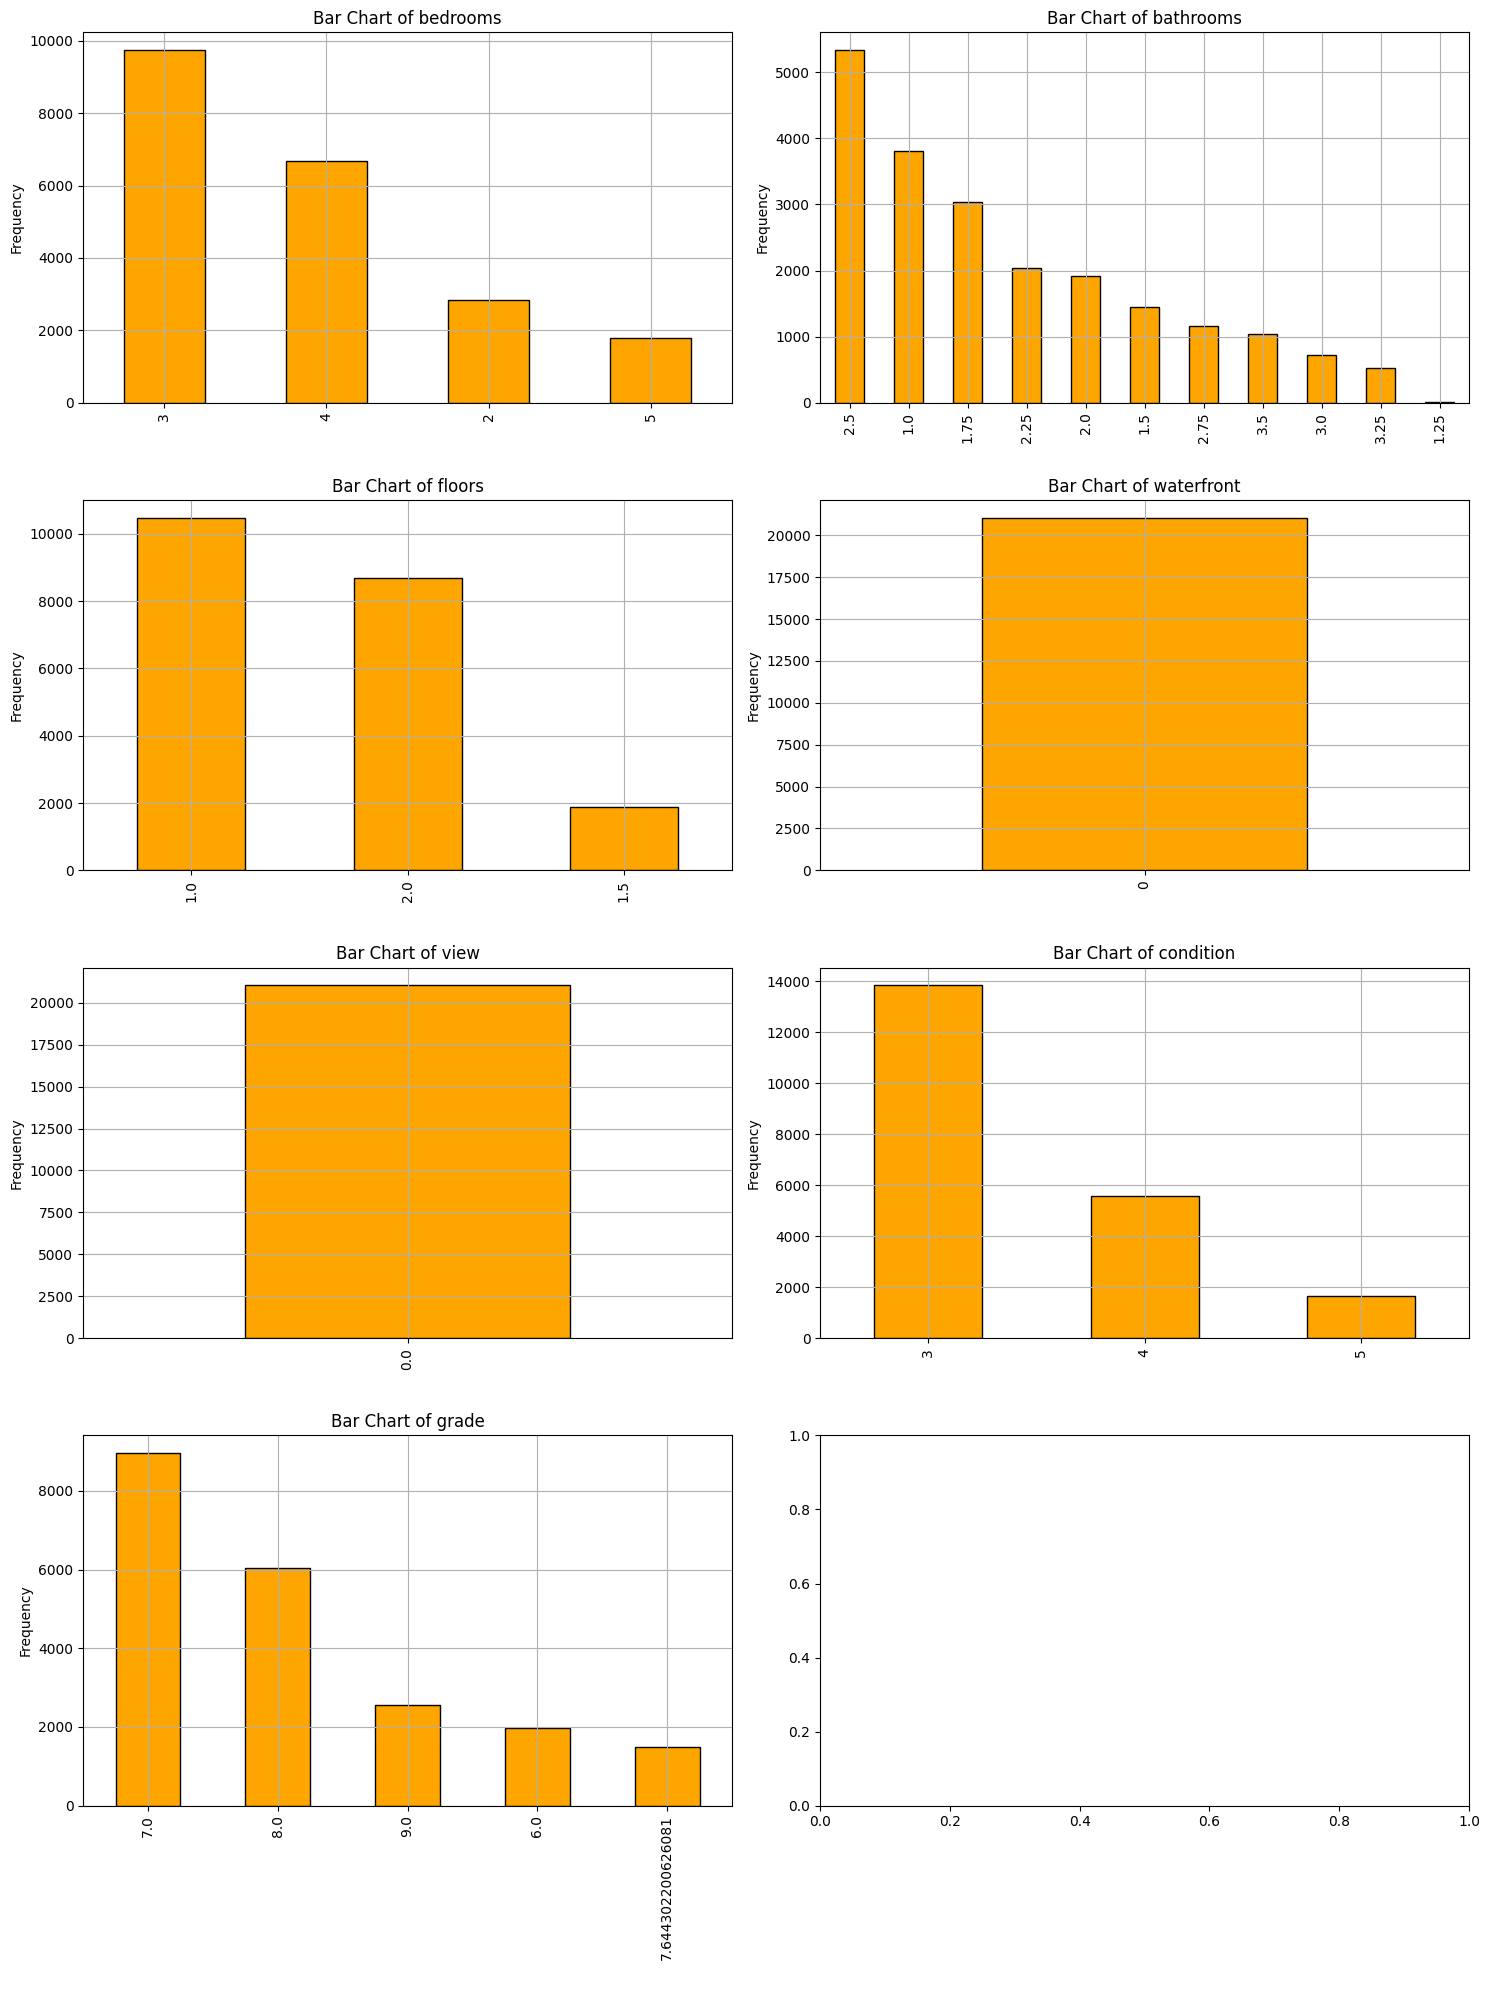

In [122]:
filtered_data = df

bar_chart_columns = [
     'bedrooms', 
     'bathrooms', 
     'floors', 
     'waterfront', 
     'view', 
     'condition', 
     'grade'
]

num_rows = len(bar_chart_columns) // 2 + len(bar_chart_columns) % 2
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))
axes = axes.flatten()

sampled_data = filtered_data

for i, column in enumerate(bar_chart_columns):
    top_values = sampled_data[column].value_counts().nlargest(20)
    top_values.plot(kind='bar', ax=axes[i], edgecolor='black', color='orange')
    axes[i].set_title(f'Bar Chart of {column}')
    axes[i].set_xlabel(' ')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

In [123]:
data=df

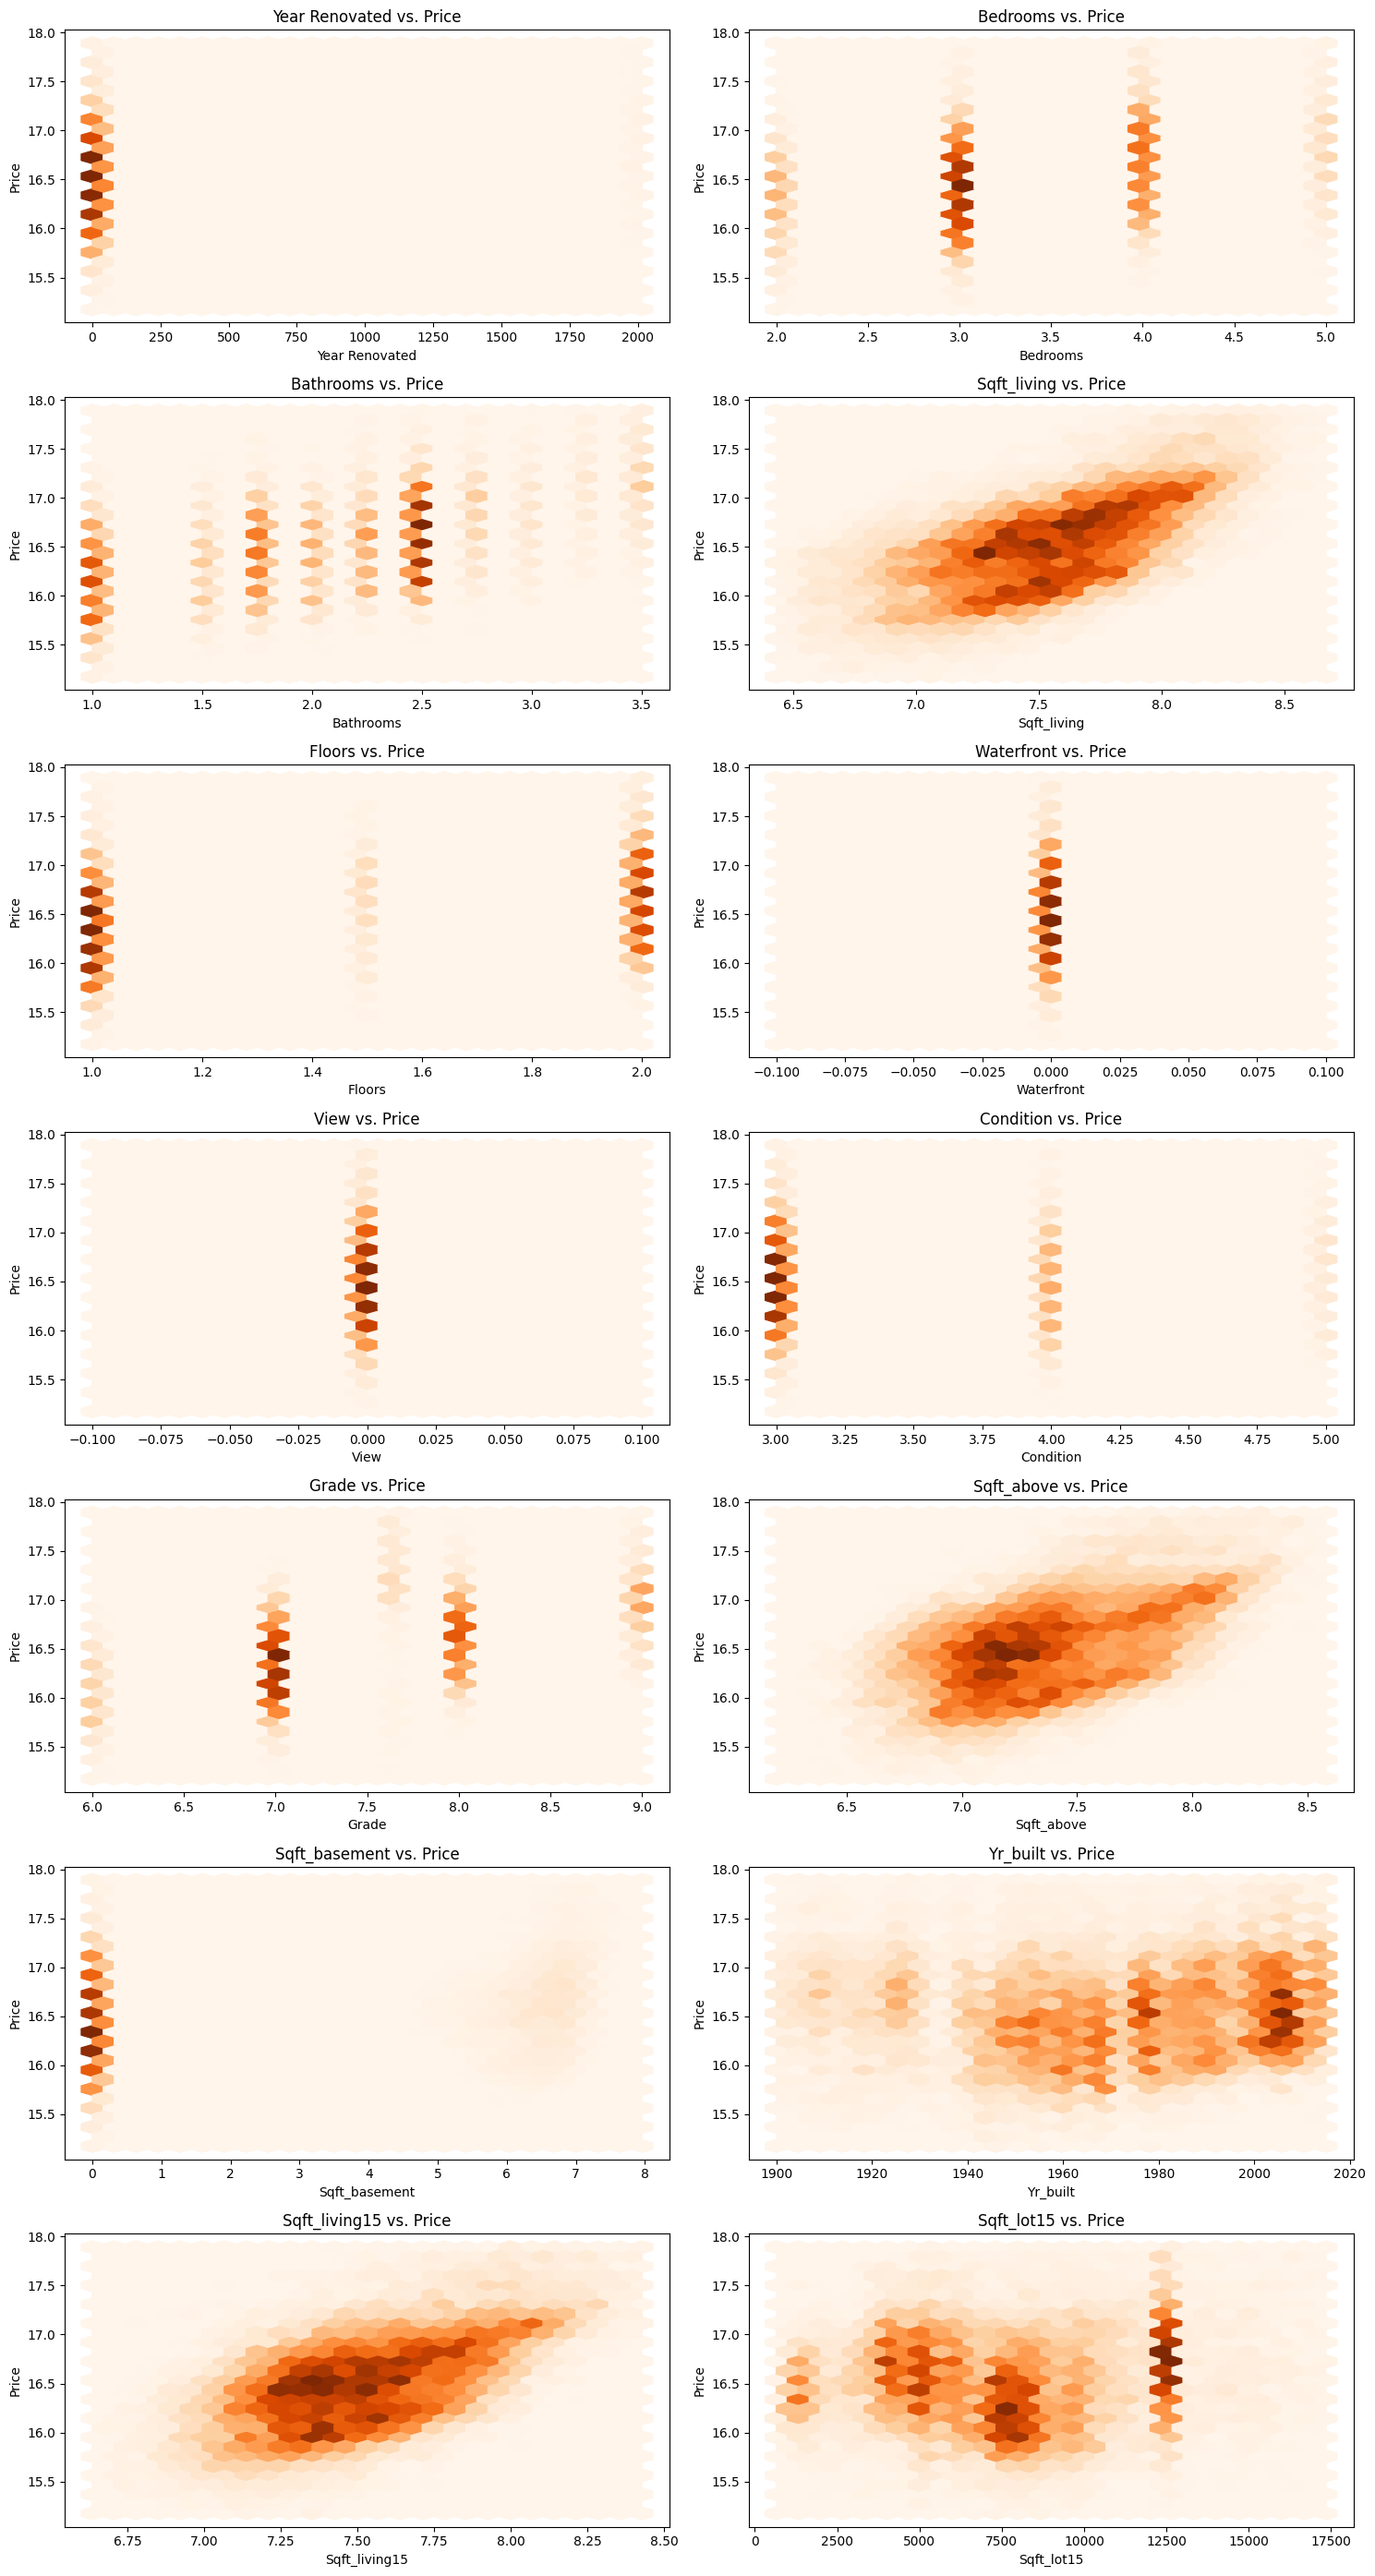

In [124]:
hexbin_variables = [
    'bedrooms',
    'bathrooms',
    'sqft_living',
    'floors',
    'waterfront',
    'view',
    'condition',
    'grade',
    'sqft_above',
    'sqft_basement',
    'yr_built',
    'sqft_living15',
    'sqft_lot15'
]

num_rows = (len(hexbin_variables) + 1) // 2
num_cols = min(2, len(hexbin_variables))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))
axes = axes.flatten()

axes[0].hexbin(data['yr_renovated'], data['price'], gridsize=25, cmap='Oranges')
axes[0].set_title('Year Renovated vs. Price')
axes[0].set_xlabel('Year Renovated')
axes[0].set_ylabel('Price')

for i, variable in enumerate(hexbin_variables, 1):
    axes[i].hexbin(data[variable], data['price'], gridsize=25, cmap='Oranges')
    axes[i].set_title(f'{variable.capitalize()} vs. Price')
    axes[i].set_xlabel(f'{variable.capitalize()}')
    axes[i].set_ylabel('Price')


plt.tight_layout()
plt.show()

In [125]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,15.806490,3,1.00,7.074117,5650.0,1.0,0,0.0,...,7.0,7.074117,0.000000,1955,0,98178,47.5112,-122.257,7.201171,5650.0
1,6414100192,20141209T000000,16.692121,3,2.25,7.852050,7242.0,2.0,0,0.0,...,7.0,7.682943,5.993961,1951,1991,98125,47.7210,-122.319,7.433075,7639.0
2,5631500400,20150225T000000,15.597220,2,1.00,6.647688,10000.0,1.0,0,0.0,...,6.0,6.647688,0.000000,1933,0,98028,47.7379,-122.233,7.908755,8062.0
3,2487200875,20141209T000000,16.807837,4,3.00,7.581210,5000.0,1.0,0,0.0,...,7.0,6.957497,6.814543,1965,0,98136,47.5208,-122.387,7.215975,5000.0
4,1954400510,20150218T000000,16.638674,3,2.00,7.427144,8080.0,1.0,0,0.0,...,8.0,7.427144,0.000000,1987,0,98074,47.6168,-122.045,7.496097,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,16.290367,3,2.50,7.333676,1131.0,2.0,0,0.0,...,8.0,7.333676,0.000000,2009,0,98103,47.6993,-122.346,7.333676,1509.0
21609,6600060120,20150223T000000,16.395727,4,2.50,7.745436,5813.0,2.0,0,0.0,...,8.0,7.745436,0.000000,2014,0,98146,47.5107,-122.362,7.512618,7200.0
21610,1523300141,20140623T000000,16.400966,2,1.00,6.928538,1350.0,2.0,0,0.0,...,7.0,6.928538,0.000000,2009,0,98144,47.5944,-122.299,6.928538,2007.0
21611,291310100,20150116T000000,16.395727,3,2.50,7.378384,2388.0,2.0,0,0.0,...,8.0,7.378384,0.000000,2004,0,98027,47.5345,-122.069,7.252054,1287.0


In [126]:
data=df

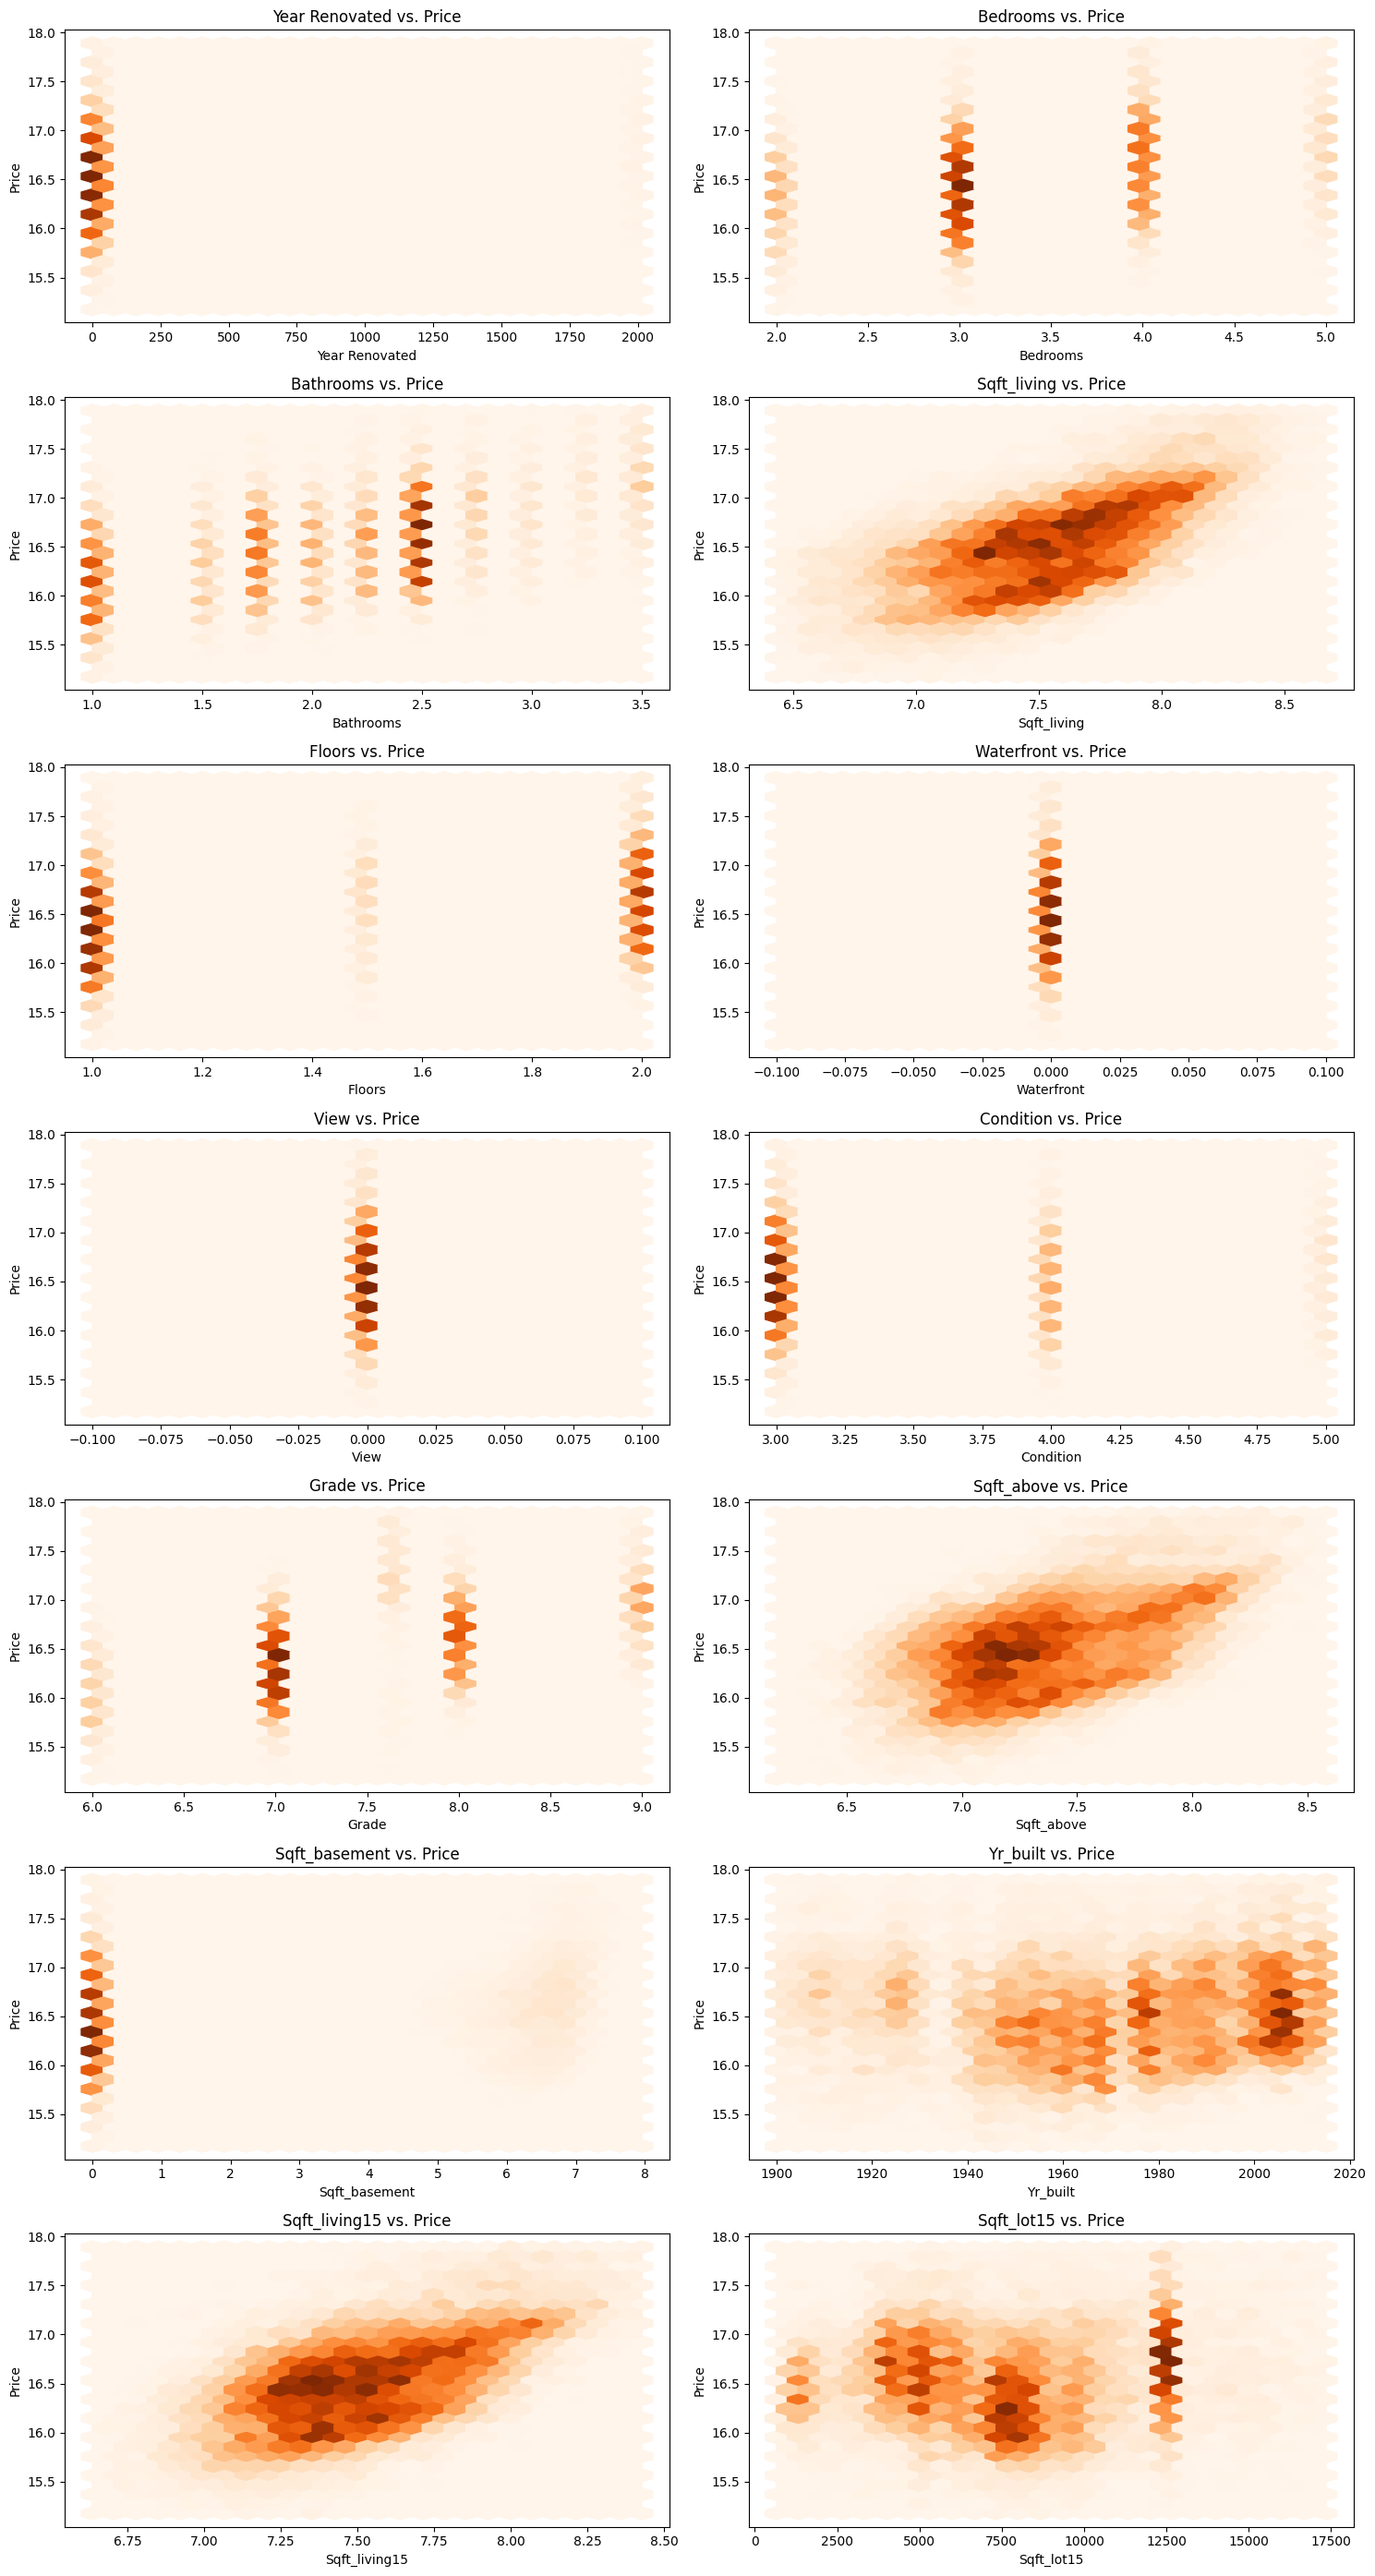

In [127]:
hexbin_variables = [
    'bedrooms',
    'bathrooms',
    'sqft_living',
    'floors',
    'waterfront',
    'view',
    'condition',
    'grade',
    'sqft_above',
    'sqft_basement',
    'yr_built',
    'sqft_living15',
    'sqft_lot15'
]

num_rows = (len(hexbin_variables) + 1) // 2
num_cols = min(2, len(hexbin_variables))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))
axes = axes.flatten()

axes[0].hexbin(data['yr_renovated'], data['price'], gridsize=25, cmap='Oranges')
axes[0].set_title('Year Renovated vs. Price')
axes[0].set_xlabel('Year Renovated')
axes[0].set_ylabel('Price')

for i, variable in enumerate(hexbin_variables, 1):
    axes[i].hexbin(data[variable], data['price'], gridsize=25, cmap='Oranges')
    axes[i].set_title(f'{variable.capitalize()} vs. Price')
    axes[i].set_xlabel(f'{variable.capitalize()}')
    axes[i].set_ylabel('Price')


plt.tight_layout()
plt.show()

In [128]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,15.806490,3,1.00,7.074117,5650.0,1.0,0,0.0,...,7.0,7.074117,0.000000,1955,0,98178,47.5112,-122.257,7.201171,5650.0
1,6414100192,20141209T000000,16.692121,3,2.25,7.852050,7242.0,2.0,0,0.0,...,7.0,7.682943,5.993961,1951,1991,98125,47.7210,-122.319,7.433075,7639.0
2,5631500400,20150225T000000,15.597220,2,1.00,6.647688,10000.0,1.0,0,0.0,...,6.0,6.647688,0.000000,1933,0,98028,47.7379,-122.233,7.908755,8062.0
3,2487200875,20141209T000000,16.807837,4,3.00,7.581210,5000.0,1.0,0,0.0,...,7.0,6.957497,6.814543,1965,0,98136,47.5208,-122.387,7.215975,5000.0
4,1954400510,20150218T000000,16.638674,3,2.00,7.427144,8080.0,1.0,0,0.0,...,8.0,7.427144,0.000000,1987,0,98074,47.6168,-122.045,7.496097,7503.0


In [129]:
dataa=df

In [130]:
dataa.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,15.806490,3,1.00,7.074117,5650.0,1.0,0,0.0,...,7.0,7.074117,0.000000,1955,0,98178,47.5112,-122.257,7.201171,5650.0
1,6414100192,20141209T000000,16.692121,3,2.25,7.852050,7242.0,2.0,0,0.0,...,7.0,7.682943,5.993961,1951,1991,98125,47.7210,-122.319,7.433075,7639.0
2,5631500400,20150225T000000,15.597220,2,1.00,6.647688,10000.0,1.0,0,0.0,...,6.0,6.647688,0.000000,1933,0,98028,47.7379,-122.233,7.908755,8062.0
3,2487200875,20141209T000000,16.807837,4,3.00,7.581210,5000.0,1.0,0,0.0,...,7.0,6.957497,6.814543,1965,0,98136,47.5208,-122.387,7.215975,5000.0
4,1954400510,20150218T000000,16.638674,3,2.00,7.427144,8080.0,1.0,0,0.0,...,8.0,7.427144,0.000000,1987,0,98074,47.6168,-122.045,7.496097,7503.0


In [144]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,0.232485,0,0,0.287228,0.282380,0,0,0.0,...,0,0.368601,0.000000,0.478261,0.000000,98178,47.5112,-122.257,0.315998,0.299359
1,6414100192,20141209T000000,0.558505,0,1,0.634846,0.370012,1,0,0.0,...,0,0.624293,0.753443,0.443478,0.988089,98125,47.7210,-122.319,0.445347,0.418468
2,5631500400,20150225T000000,0.155448,1,0,0.096679,0.521825,0,0,0.0,...,1,0.189512,0.000000,0.286957,0.000000,98028,47.7379,-122.233,0.710667,0.443799
3,2487200875,20141209T000000,0.601103,2,2,0.513821,0.246601,0,0,0.0,...,0,0.319624,0.856591,0.565217,0.000000,98136,47.5208,-122.387,0.324255,0.260435
4,1954400510,20150218T000000,0.538830,0,3,0.444977,0.416139,0,0,0.0,...,2,0.516864,0.000000,0.756522,0.000000,98074,47.6168,-122.045,0.480499,0.410324


In [145]:
data=df

In [146]:
dataa.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,0.232485,0,0,0.287228,0.282380,0,0,0.0,0,0,0.368601,0.000000,0.478261,0.000000,98178,47.5112,-122.257,0.315998,0.299359
1,20141209T000000,0.558505,0,1,0.634846,0.370012,1,0,0.0,0,0,0.624293,0.753443,0.443478,0.988089,98125,47.7210,-122.319,0.445347,0.418468
2,20150225T000000,0.155448,1,0,0.096679,0.521825,0,0,0.0,0,1,0.189512,0.000000,0.286957,0.000000,98028,47.7379,-122.233,0.710667,0.443799
3,20141209T000000,0.601103,2,2,0.513821,0.246601,0,0,0.0,1,0,0.319624,0.856591,0.565217,0.000000,98136,47.5208,-122.387,0.324255,0.260435
4,20150218T000000,0.538830,0,3,0.444977,0.416139,0,0,0.0,0,2,0.516864,0.000000,0.756522,0.000000,98074,47.6168,-122.045,0.480499,0.410324


In [147]:
#dropping the date view waterfront columns
data=data.drop(['date','view','waterfront'],axis=1)

In [148]:
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,0.232485,0,0,0.287228,0.282380,0,0,0,0.368601,0.000000,0.478261,0.000000,98178,47.5112,-122.257,0.315998,0.299359
1,6414100192,0.558505,0,1,0.634846,0.370012,1,0,0,0.624293,0.753443,0.443478,0.988089,98125,47.7210,-122.319,0.445347,0.418468
2,5631500400,0.155448,1,0,0.096679,0.521825,0,0,1,0.189512,0.000000,0.286957,0.000000,98028,47.7379,-122.233,0.710667,0.443799
3,2487200875,0.601103,2,2,0.513821,0.246601,0,1,0,0.319624,0.856591,0.565217,0.000000,98136,47.5208,-122.387,0.324255,0.260435
4,1954400510,0.538830,0,3,0.444977,0.416139,0,0,2,0.516864,0.000000,0.756522,0.000000,98074,47.6168,-122.045,0.480499,0.410324


In [149]:
data=data.drop(['id'],axis=1)

In [150]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.232485,0,0,0.287228,0.282380,0,0,0,0.368601,0.000000,0.478261,0.000000,98178,47.5112,-122.257,0.315998,0.299359
1,0.558505,0,1,0.634846,0.370012,1,0,0,0.624293,0.753443,0.443478,0.988089,98125,47.7210,-122.319,0.445347,0.418468
2,0.155448,1,0,0.096679,0.521825,0,0,1,0.189512,0.000000,0.286957,0.000000,98028,47.7379,-122.233,0.710667,0.443799
3,0.601103,2,2,0.513821,0.246601,0,1,0,0.319624,0.856591,0.565217,0.000000,98136,47.5208,-122.387,0.324255,0.260435
4,0.538830,0,3,0.444977,0.416139,0,0,2,0.516864,0.000000,0.756522,0.000000,98074,47.6168,-122.045,0.480499,0.410324


In [151]:
feature = [
     'price', 
     'sqft_living',
     'sqft_lot', 
     'sqft_above', 
     'sqft_basement', 
     'yr_built',
     'yr_renovated',
     'sqft_living15', 
     'sqft_lot15',
     'zipcode',
     'lat',
     'long'
]

for f in feature:
    data[f] = (data[f] - data[f].min()) / (data[f].max() - data[f].min())

In [152]:
feature = [
     'bedrooms', 
     'bathrooms', 
     'floors', 
     'condition', 
     'grade'
]

for f in feature:
    unique_values = data[f].unique()
    encoding_map = {value: index for index, value in enumerate(unique_values)}
    data[f] = data[f].map(encoding_map)

In [153]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.232485,0,0,0.287228,0.282380,0,0,0,0.368601,0.000000,0.478261,0.000000,0.893939,0.571498,0.318627,0.315998,0.299359
1,0.558505,0,1,0.634846,0.370012,1,0,0,0.624293,0.753443,0.443478,0.988089,0.626263,0.908959,0.166667,0.445347,0.418468
2,0.155448,1,0,0.096679,0.521825,0,0,1,0.189512,0.000000,0.286957,0.000000,0.136364,0.936143,0.377451,0.710667,0.443799
3,0.601103,2,2,0.513821,0.246601,0,1,0,0.319624,0.856591,0.565217,0.000000,0.681818,0.586939,0.000000,0.324255,0.260435
4,0.538830,0,3,0.444977,0.416139,0,0,2,0.516864,0.000000,0.756522,0.000000,0.368687,0.741354,0.838235,0.480499,0.410324


In [154]:
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.279305,0.369429,0.634402,0.085252,0.260052,-0.024624,0.533666,0.537768,0.218144,0.063147,0.102293,-0.014942,0.471047,0.064376,0.574611,0.068384
bedrooms,0.279305,1.000000,0.223763,0.444151,0.103294,0.152889,-0.013830,0.226087,0.349907,0.143410,0.046598,0.018405,-0.044943,0.031751,0.067777,0.305357,0.090526
bathrooms,0.369429,0.223763,1.000000,0.555524,0.071760,0.155466,-0.101147,0.313637,0.468178,0.169212,0.362412,0.029355,-0.143005,0.005521,0.184891,0.405904,0.065504
sqft_living,0.634402,0.444151,0.555524,1.000000,0.300364,0.278150,-0.086833,0.540086,0.849166,0.268261,0.349227,0.040027,-0.215518,0.022865,0.288190,0.733396,0.278586
sqft_lot,0.085252,0.103294,0.071760,0.300364,1.000000,-0.191483,0.148538,0.162389,0.279065,-0.001581,0.011748,0.010039,-0.293412,-0.137778,0.355267,0.359209,0.894997
floors,0.260052,0.152889,0.155466,0.278150,-0.191483,1.000000,-0.156183,0.244982,0.433590,-0.217315,0.103552,0.038032,0.021740,0.049014,0.043327,0.175018,-0.217299
condition,-0.024624,-0.013830,-0.101147,-0.086833,0.148538,-0.156183,1.000000,-0.154358,-0.170095,0.116901,-0.335191,-0.065031,-0.045344,-0.051191,-0.076130,-0.089780,0.163366
grade,0.533666,0.226087,0.313637,0.540086,0.162389,0.244982,-0.154358,1.000000,0.582478,-0.032867,0.337814,0.006848,-0.138818,0.065762,0.211448,0.555295,0.161211
sqft_above,0.537768,0.349907,0.468178,0.849166,0.279065,0.433590,-0.170095,0.582478,1.000000,-0.235097,0.456783,0.015432,-0.288217,-0.037201,0.400483,0.697415,0.256751
sqft_basement,0.218144,0.143410,0.169212,0.268261,-0.001581,-0.217315,0.116901,-0.032867,-0.235097,1.000000,-0.175720,0.049571,0.156417,0.131678,-0.236228,0.071497,-0.001933


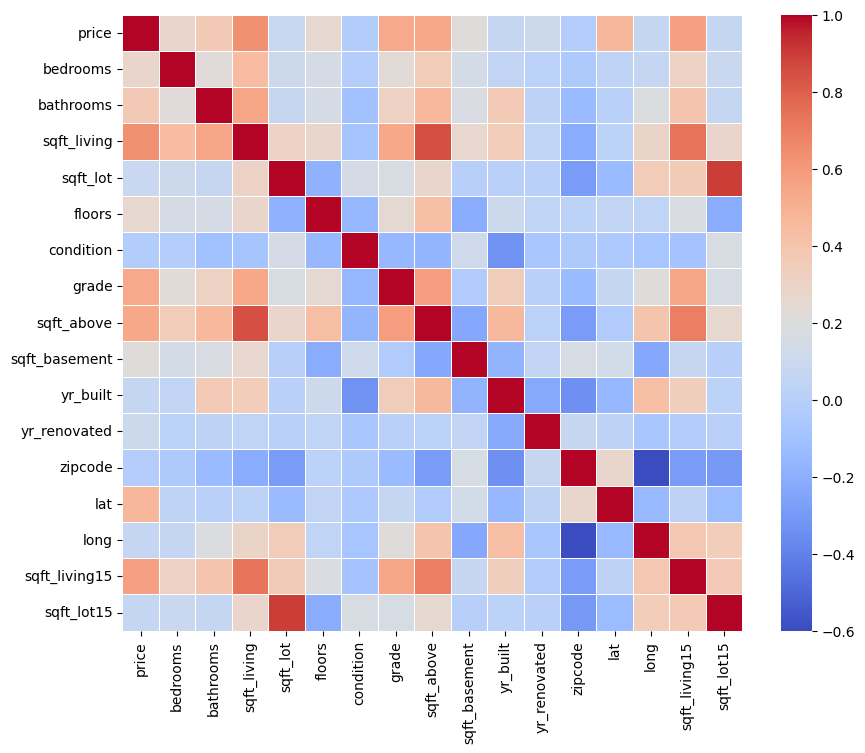

In [155]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

In [156]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.232485,0,0,0.287228,0.282380,0,0,0,0.368601,0.000000,0.478261,0.000000,0.893939,0.571498,0.318627,0.315998,0.299359
1,0.558505,0,1,0.634846,0.370012,1,0,0,0.624293,0.753443,0.443478,0.988089,0.626263,0.908959,0.166667,0.445347,0.418468
2,0.155448,1,0,0.096679,0.521825,0,0,1,0.189512,0.000000,0.286957,0.000000,0.136364,0.936143,0.377451,0.710667,0.443799
3,0.601103,2,2,0.513821,0.246601,0,1,0,0.319624,0.856591,0.565217,0.000000,0.681818,0.586939,0.000000,0.324255,0.260435
4,0.538830,0,3,0.444977,0.416139,0,0,2,0.516864,0.000000,0.756522,0.000000,0.368687,0.741354,0.838235,0.480499,0.410324


In [157]:
from sklearn.model_selection import train_test_split

# Assuming your DataFrame is named 'df'
X = data.drop('price', axis=1)  # Features (all columns except 'price')
y = data['price']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (16840, 16)
X_test shape: (4210, 16)
y_train shape: (16840,)
y_test shape: (4210,)


In [158]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.232485,0,0,0.287228,0.282380,0,0,0,0.368601,0.000000,0.478261,0.000000,0.893939,0.571498,0.318627,0.315998,0.299359
1,0.558505,0,1,0.634846,0.370012,1,0,0,0.624293,0.753443,0.443478,0.988089,0.626263,0.908959,0.166667,0.445347,0.418468
2,0.155448,1,0,0.096679,0.521825,0,0,1,0.189512,0.000000,0.286957,0.000000,0.136364,0.936143,0.377451,0.710667,0.443799
3,0.601103,2,2,0.513821,0.246601,0,1,0,0.319624,0.856591,0.565217,0.000000,0.681818,0.586939,0.000000,0.324255,0.260435
4,0.538830,0,3,0.444977,0.416139,0,0,2,0.516864,0.000000,0.756522,0.000000,0.368687,0.741354,0.838235,0.480499,0.410324


In [159]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming your DataFrame is named 'data'
X = data.drop('price', axis=1)  # Features (all columns except 'price')
y = data['price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 0.07380959909879699
Mean Squared Error (MSE): 0.00918948168568889
Root Mean Squared Error (RMSE): 0.09586178428179234
R-squared (R2): 0.706773900268826


In [160]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming your DataFrame is named 'data'
X = data.drop('price', axis=1)  # Features (all columns except 'price')
y = data['price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree regression model
model = DecisionTreeRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 0.06597064619788423
Mean Squared Error (MSE): 0.008337865415212847
Root Mean Squared Error (RMSE): 0.09131191277819585
R-squared (R2): 0.7339480245557475


In [161]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming your DataFrame is named 'data'
X = data.drop('price', axis=1)  # Features (all columns except 'price')
y = data['price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regression model
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 0.046061015437311795
Mean Squared Error (MSE): 0.004131697756207852
Root Mean Squared Error (RMSE): 0.06427828370614645
R-squared (R2): 0.8681621380009258


In [162]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming your DataFrame is named 'data'
X = data.drop('price', axis=1)  # Features (all columns except 'price')
y = data['price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost regression model
model = xgb.XGBRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 0.04480965051330224
Mean Squared Error (MSE): 0.0039211847805857136
Root Mean Squared Error (RMSE): 0.06261936426206924
R-squared (R2): 0.8748793719968991


In [165]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming your DataFrame is named 'data'
X = data.drop('price', axis=1)  # Features (all columns except 'price')
y = data['price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for SVR)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SVR model
model = SVR(kernel='linear')  # You can experiment with different kernels like 'linear', 'poly', or 'rbf'

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 0.07405230363374188
Mean Squared Error (MSE): 0.009197434742999276
Root Mean Squared Error (RMSE): 0.09590325720745503
R-squared (R2): 0.706520127090335


In [166]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming your DataFrame is named 'data'
X = data.drop('price', axis=1)  # Features (all columns except 'price')
y = data['price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a KNN regression model
model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 0.05866198832356742
Mean Squared Error (MSE): 0.006481245009546674
Root Mean Squared Error (RMSE): 0.08050617994630396
R-squared (R2): 0.793190708621665


In [167]:
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming your DataFrame is named 'data'
X = data.drop('price', axis=1)  # Features (all columns except 'price')
y = data['price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for some regression models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Huber Regressor model
model = HuberRegressor()  # You can adjust hyperparameters if needed

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 0.07356298558966742
Mean Squared Error (MSE): 0.009249245535705096
Root Mean Squared Error (RMSE): 0.09617299795527379
R-squared (R2): 0.7048669025463687


In [168]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming your DataFrame is named 'data'
X = data.drop('price', axis=1)  # Features (all columns except 'price')
y = data['price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for some regression models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an ElasticNet model
model = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
# You can adjust the regularization strength (alpha) and the L1 ratio as needed

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 0.1428754450266735
Mean Squared Error (MSE): 0.03134617226678262
Root Mean Squared Error (RMSE): 0.1770485025827178
R-squared (R2): -0.00022135629308017712


In [169]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming your DataFrame is named 'data'
X = data.drop('price', axis=1)  # Features (all columns except 'price')
y = data['price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for some regression models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Gaussian Process kernel
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))

# Create a Gaussian Process Regression model
model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, random_state=42)
# You can adjust the kernel parameters and other hyperparameters as needed

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred, sigma = model.predict(X_test_scaled, return_std=True)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
